**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [2]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
s = json.load( open("fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  mplDeprecation)


In [13]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0,0.5,'endogenous')

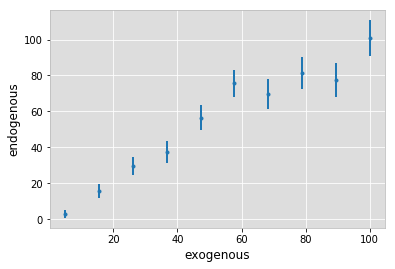

In [4]:
np.random.seed(2018)
x = np.linspace(5,100,10)
y = line(1, x, 0, errors)

fig = pl.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.errorbar(x,y,yerr=errors(x), fmt='.')
ax.set_xlabel('exogenous')
ax.set_ylabel('endogenous')

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [5]:
print(x)

[   5.           15.55555556   26.11111111   36.66666667   47.22222222
   57.77777778   68.33333333   78.88888889   89.44444444  100.        ]


In [6]:
print(y)

[   2.99443383   15.58252759   29.52134423   37.34133469   56.48541836
   75.60974768   69.59744926   81.58457547   77.71805603  100.71882076]


In [7]:
print(sm.add_constant(x))

[[   1.            5.        ]
 [   1.           15.55555556]
 [   1.           26.11111111]
 [   1.           36.66666667]
 [   1.           47.22222222]
 [   1.           57.77777778]
 [   1.           68.33333333]
 [   1.           78.88888889]
 [   1.           89.44444444]
 [   1.          100.        ]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [8]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     636.8
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.16e-09
Time:                        00:31:20   Log-Likelihood:                -34.181
No. Observations:                  10   AIC:                             70.36
Df Residuals:                       9   BIC:                             70.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.0243      0.041     25.235      0.000         0.932     1.116
==============================================================================
Omnibus:                        2.643   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                0.321
Skew:                           0.196   Prob(JB):                        0.852
Kurtosis:                       3.786   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#THE RIGHT WAY
olsmod = sm.OLS(endog = y, exog = sm.add_constant(x), missing = 'drop').fit()
olsmod.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     135.9
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           2.67e-06
Time:                        00:31:20   Log-Likelihood:                -33.847
No. Observations:                  10   AIC:                             71.69
Df Residuals:                       8   BIC:                             72.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.7524      5.048      0.743      0.479        -7.888    15.393
x1             0.9707      0.083     11.658      0.000         0.779     1.163
==============================================================================
Omnibus:                        2.836   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                0.589
Skew:                           0.523   Prob(JB):                        0.745
Kurtosis:                       3.563   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

Text(0.5,1,'Scatter plot with fitted line without constant')

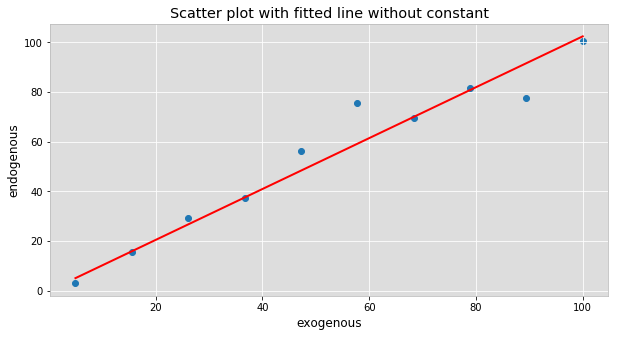

In [10]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y)
line = ax.plot(x, smfit.fittedvalues, '-', c='r')
ax.set_xlabel('exogenous')
ax.set_ylabel('endogenous')
ax.set_title('Scatter plot with fitted line without constant')

**Figure : OLS linear regression model without constant**

Text(0.5,1,'Scatter plot with fitted line with constant')

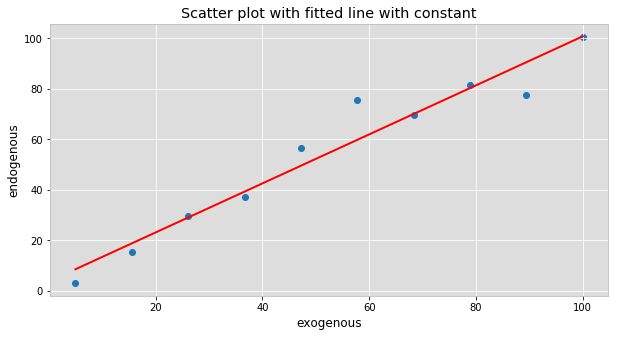

In [11]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y)
line = ax.plot(x, olsmod.fittedvalues, '-', c='r')
ax.set_xlabel('exogenous')
ax.set_ylabel('endogenous')
ax.set_title('Scatter plot with fitted line with constant')

**Figure : OLS linear regression model with constant**

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0,0.5,'endogenous')

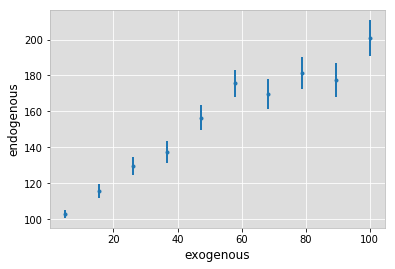

In [14]:
np.random.seed(2018)
x1 = np.linspace(5,100,10)
y1 = line(1, x1, 100, errors)

fig = pl.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.errorbar(x1,y1,yerr=errors(x), fmt='.')
ax.set_xlabel('exogenous')
ax.set_ylabel('endogenous')

# 6. repeat step 3

In [15]:
#THE WRONG WAY
smfit = smf.OLS(y1, x1).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     72.54
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.34e-05
Time:                        00:31:38   Log-Likelihood:                -53.774
No. Observations:                  10   AIC:                             109.5
Df Residuals:                       9   BIC:                             109.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.4527      0.288      8.517      0.000         1.801     3.104
==============================================================================
Omnibus:                        1.270   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                0.754
Skew:                          -0.259   Prob(JB):                        0.686
Kurtosis:                       1.758   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#THE RIGHT WAY
olsmod = sm.OLS(endog = y1, exog = sm.add_constant(x1), missing = 'drop').fit()
olsmod.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     135.9
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           2.67e-06
Time:                        00:31:38   Log-Likelihood:                -33.847
No. Observations:                  10   AIC:                             71.69
Df Residuals:                       8   BIC:                             72.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        103.7524      5.048     20.553      0.000        92.112   115.393
x1             0.9707      0.083     11.658      0.000         0.779     1.163
==============================================================================
Omnibus:                        2.836   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                0.589
Skew:                           0.523   Prob(JB):                        0.745
Kurtosis:                       3.563   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [17]:
wlsmod = sm.WLS(endog=y1, exog= sm.add_constant(x1), weights = 1/(errors(x))).fit()
wlsmod.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            WLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     203.2
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           5.71e-07
Time:                        00:31:41   Log-Likelihood:                -33.026
No. Observations:                  10   AIC:                             70.05
Df Residuals:                       8   BIC:                             70.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        100.7732      3.526     28.577      0.000        92.641   108.905
x1             1.0219      0.072     14.256      0.000         0.857     1.187
==============================================================================
Omnibus:                        2.300   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.317   Jarque-Bera (JB):                0.413
Skew:                           0.449   Prob(JB):                        0.813
Kurtosis:                       3.430   Cond. No.                         79.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

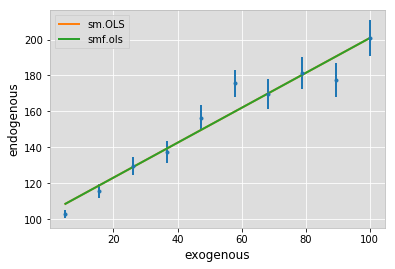

In [22]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x1, 'y':y1, 'const':np.ones(len(x1))}).fit()
pl.errorbar(x1, y1, yerr=errors(x1), fmt='.')
pl.plot(x1, olsmod.fittedvalues, '-', label="sm.OLS")
pl.plot(x1, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();